# Método de Aceptación y Rechazo

Es una técnica utilizada para generar muestras aleatorias a partir de una distribución deseada. A continuación, se presenta un ejemplo que muestra cómo se usa el método para generar muestras de una distribución de densidad de probabilidad específica.

## Funciones y librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

#FDP de la distribución exponencial
def fdp_exponencial(x, lmbda):
    return lmbda * np.exp(-lmbda * x)

#FDA de la ditribución exponencial
def fda_exponencial(x, lmbda):
    return 1 - np.exp(-lmbda * x)

# Método de aceptación y rechazo
def generador_aceptacion_rechazo(n, lmbda):
    muestras = []
    c = 1  #constate mayor o igual a la máxima fdp
    while len(muestras) < n:
        #generar valores candidatos
        x_candidato = np.random.uniform(0, 10)
        y_candidato = np.random.uniform(0, c * lmbda)
        #aceptar o rechazar el valor candidato
        if y_candidato <= fdp_exponencial(x_candidato, lmbda):
            muestras.append(x_candidato)
    return np.array(muestras)


##Parámetros

In [ ]:
#Parámetros de la distribución exponencial
lmbda = 1.0

#Número de muestras a generar
n_muestras = 1000

#Generar muestras
muestras = generador_aceptacion_rechazo(n_muestras, lmbda)

#Crear puntos para graficar la FDP y la FDA
x = np.linspace(0, 10, 1000)
fdp_vals = fdp_exponencial(x, lmbda)
fda_vals = fda_exponencial(x, lmbda)

## Gráficas

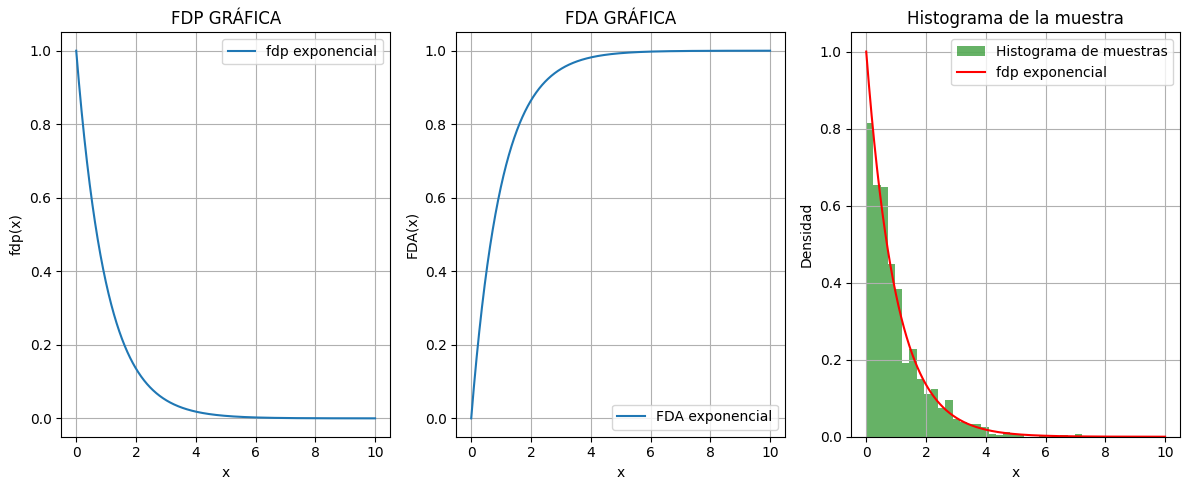

In [ ]:
#FDP  GRÁFICA
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(x, fdp_vals, label='fdp exponencial')
plt.title('FDP GRÁFICA')
plt.xlabel('x')
plt.ylabel('fdp(x)')
plt.legend()
plt.grid(True)

#FDA GRÁFICA
plt.subplot(1, 3, 2)
plt.plot(x, fda_vals, label='FDA exponencial')
plt.title('FDA GRÁFICA')
plt.xlabel('x')
plt.ylabel('FDA(x)')
plt.legend()
plt.grid(True)

#Histograma de la muesta
plt.subplot(1, 3, 3)
plt.hist(muestras, bins=30, density=True, alpha=0.6, color='g', label='Histograma de muestras')
plt.plot(x, fdp_vals, 'r-', label='fdp exponencial')
plt.title('Histograma de la muestra')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Documentación

1. **fdp_exponencial**: Esta función calcula la función de densidad de probabilidad (fdp) de una distribución exponencial con un parámetro λ (lambda).
2. **fda_exponencial**: Esta función calcula la función de distribución acumulativa (FDA) de una distribución exponencial con un parámetro λ (lambda).
3. **generador_aceptacion_rechazo**: Esta función genera muestras utilizando el método de aceptación y rechazo. Primero, genera valores candidatos uniformemente distribuidos en un rango definido. Luego, acepta o rechaza cada candidato basándose en la comparación con la fdp.
4. **Gráficas**:
    - La primera gráfica muestra la fdp de la distribución exponencial.
    - La segunda gráfica muestra la FDA de la distribución exponencial.
    - La tercera gráfica es un histograma de las muestras generadas, comparado con la fdp teórica.